# Get physio data #

Let's start by adding the necessary packages. This is not yet an official python package, so the pycequeau folder need to be added using the next code block:

In [1]:
import sys
import os
pwd = os.getcwd()
two_levels_down = os.path.abspath(os.path.join(pwd, '..','..'))
sys.path.append(two_levels_down)

Now, we start using the `physiographic` module

In [2]:
from src.physiographic.base import Basin

Before start using the toolbox, you need to set up the working directory project. To do so, we need to run this code lines and the toolbox will create the project folder structure as follows:

```
Project/
|-- geographic/
|-- meteo/
|-- results/
```


In [ ]:
project_folder = "path/to/your/project/"
files_list = ["DEM_grass.tif", # DEM tif file
                "FAC_grass.tif", #Flow accumulation tif file
                "LC_grass.tif", # Land conver tif file
                "Watershed_grass.tif", # Watershed tif file
                "CAT_grass.tif", #Sub basins tif file
                "Canopy" ,#Canopy tif file
                ]

# 2- Create basin Object:
basin = Basin(project_folder,
              "Melezes", #Basin name
              files_list)


In this point, you need to place all the files contained in the list `files_list` into the `geographic` folder. It is very straight forward to use the toolbox by running the next chain of instructions. 

In [4]:
# 3 - Select Fisnet dimensions. This dimenssions are given in m
basin.set_dimensions(7500, 7500)

In [ ]:
# 4 - Create CE and CP fishnet
basin.create_CEfishnet()
basin.create_CPfishnet()

In [ ]:
# 5 - Remove the small CPs in the basin
basin.polish_CPfishnet()

In [ ]:
# 6 - Do the routing process
basin.CP_routing()

> **_NOTE:_** If you wish to compute the mean slope in each CE, you need to provide the `Slope.tif` file in the `geographic` folder before executing the following lines. The slope can be compute either using QGIS or GRASS-GIS. If you do not need this, ignore this NOTE



In [ ]:
# 7 - Create the carreaux entiers structure
basin.carreauxEntiers_struct()

In [ ]:
# 8 - Create carreux partiels structure
basin.carreauxPartiels_struct()

In [10]:
# 8 - Create the bassinVersant structure
basin.create_bassinVersant_structure()

Now, let's graph some of the obtained results. First, we will plot the CE fishnet renumbered with the correct CE id

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
project_folder = "path/to/your/project/"
CE_fishnet = gpd.read_file(os.path.join(project_folder,"geographic","CE_fishnet.shp"))
CE_fishnet.head()

,CEid,newCEid,altitude,i,j,geometry
0,1319,1,70.735453,42,44,"POLYGON ((-68359.006 1519967.075, -60888.379 1..."
1,1318,2,172.293286,42,45,"POLYGON ((-68359.006 1527437.605, -60888.379 1..."
2,1278,3,154.408784,41,44,"POLYGON ((-75829.633 1519967.075, -68359.006 1..."
3,1277,4,177.598926,41,45,"POLYGON ((-75829.633 1527437.605, -68359.006 1..."
4,1279,5,123.086358,41,43,"POLYGON ((-75829.633 1512496.544, -68359.006 1..."


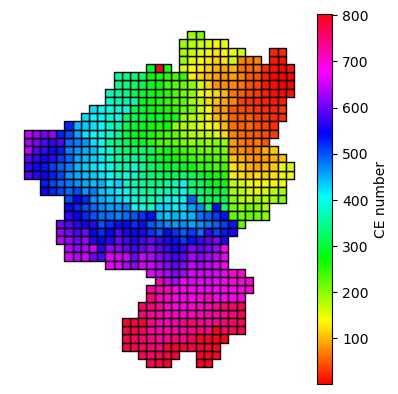

In [13]:
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
# Axis
CE_fishnet.plot(column='newCEid', cmap='hsv', ax=ax, legend=True, cax=cax,
                legend_kwds={'label': "CE number",
                        'orientation': "vertical"},
                edgecolor='black')
ax.set_axis_off();

Now, let's do the same with the CP fishnet

In [14]:
CP_fishnet = gpd.read_file(os.path.join(project_folder,"geographic","CP_fishnet.shp"))
CP_fishnet.head()

,CEid,raster_val,validity,CATid,Area,Dissolve,maxFAC,CPid,newCPid,newCEid,pctSurface,cumulPctSu,cumulArea,altitude,i,j,geometry
0,1319,57.0,Valid Geometry,8.0,2.492216e+07,0,44847875.0,968,1,1,44.655731,72240.926759,40317.335142,70.735453,42,44,"POLYGON ((-68359.006 1519967.075, -64578.689 1..."
1,1318,57.0,Valid Geometry,8.0,3.156159e+07,0,271405.0,969,2,2,56.552314,693.788810,387.200403,172.293272,42,45,"POLYGON ((-68359.006 1527437.605, -65388.757 1..."
2,1278,57.0,Valid Geometry,8.0,5.580955e+07,0,44524074.0,984,3,3,100.000000,71466.100547,39884.908130,154.408784,41,44,"POLYGON ((-75829.633 1519967.075, -68359.006 1..."
3,1277,57.0,Valid Geometry,8.0,5.580955e+07,0,238625.0,985,4,4,100.000000,637.236496,355.638812,177.598926,41,45,"POLYGON ((-75829.633 1527437.605, -68359.006 1..."
4,1279,57.0,Valid Geometry,8.0,5.427931e+07,0,44366507.0,983,5,5,97.258109,71366.100547,39829.098582,123.086358,41,43,"POLYGON ((-75829.633 1512496.544, -68359.006 1..."


c:\Users\Owner\anaconda3\envs\pycequeau\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


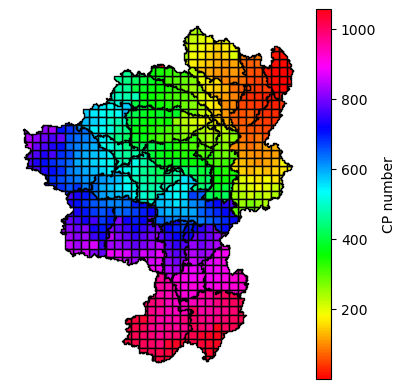

In [15]:
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
CP_fishnet.plot(column='newCPid', cmap='hsv', ax=ax, legend=True, cax=cax,
                legend_kwds={'label': "CP number",
                        'orientation': "vertical"},
                edgecolor='black')
ax.set_axis_off();

If you want to see the flow structure of your basin, run the folowing instruction:

c:\Users\Owner\anaconda3\envs\pycequeau\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


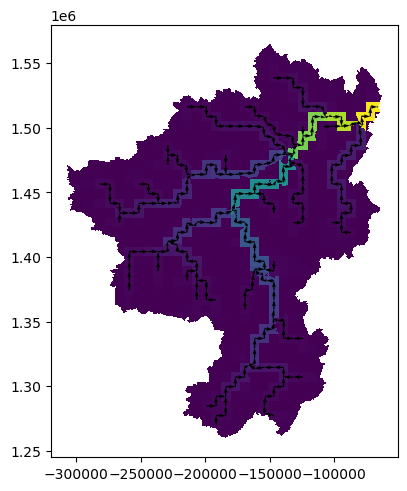

In [17]:
basin.plot_routing()

The bassinVersant strcuture is saved as a `.json` file that contains all the information to make the CEQUEAU model run in the Matlab environment. The translation routines of the `.json` file to Matlab structure can be found [here](https://github.com/erinconv/pycequeau/tree/main/matlab)